In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn import metrics
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import seaborn as sns
import folium
from folium.plugins import HeatMap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sm
import math
from sklearn.preprocessing import scale

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, linalg
# Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from math import log
from sklearn import metrics

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df_hp = pd.read_excel("kc_house_data.xlsx")
df_hp.describe().astype(np.int64)

,no,id,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613,21613,21613,21613,21610,21613,21613,21613,21613,...,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
mean,10807,4580301520,2014,6,15,540089,3,2,2079,15106,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6239,2876565571,0,3,8,367150,0,0,918,41420,...,1,828,442,29,401,53,0,0,685,27304
min,1,1000102,2014,1,1,75000,0,0,290,520,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5404,2123049194,2014,4,8,321612,3,1,1427,5040,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10807,3904930410,2014,6,16,450000,3,2,1910,7618,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308900445,2015,9,23,645000,4,2,2550,10688,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,31,7700000,33,8,13540,1651359,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


In [3]:
df_hp.isnull()

,no,id,date,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
no               21613 non-null int64
id               21613 non-null int64
date             21613 non-null object
Year             21613 non-null int64
Month            21613 non-null int64
Day              21613 non-null int64
price            21610 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_l

In [5]:
df_hp['bathrooms']=df_hp['bathrooms'].astype(np.int64)
df_hp['floors']=df_hp['floors'].astype(np.int64)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
no               21613 non-null int64
id               21613 non-null int64
date             21613 non-null object
Year             21613 non-null int64
Month            21613 non-null int64
Day              21613 non-null int64
price            21610 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_livin

In [6]:
df_hp.dropna(inplace=True)
df_hp.describe().astype(np.int64)

,no,id,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610,...,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610
mean,10808,4579931370,2014,6,15,540089,3,1,2080,15107,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6238,2876575494,0,3,8,367150,0,0,918,41423,...,1,828,442,29,401,53,0,0,685,27306
min,1,1000102,2014,1,1,75000,0,0,290,520,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5406,2123049179,2014,4,8,321612,3,1,1430,5040,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10808,3904925745,2014,6,16,450000,3,2,1910,7617,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308825087,2015,9,23,645000,4,2,2550,10687,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,31,7700000,33,8,13540,1651359,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


Text(0.5,1,'house price by count')

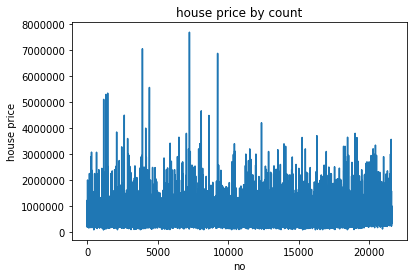

In [7]:
#visualization 1
df_hp_timestamp_trend = df_hp.groupby(['no'])['price'].mean()
df_hp_timestamp_trend.plot()
plt.ylabel('house price')
plt.title('house price by count')

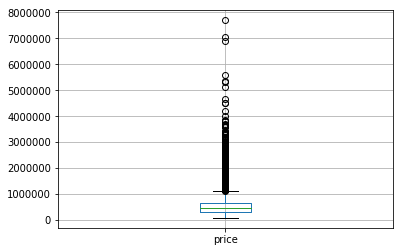

In [8]:
df_hp.boxplot(column='price')

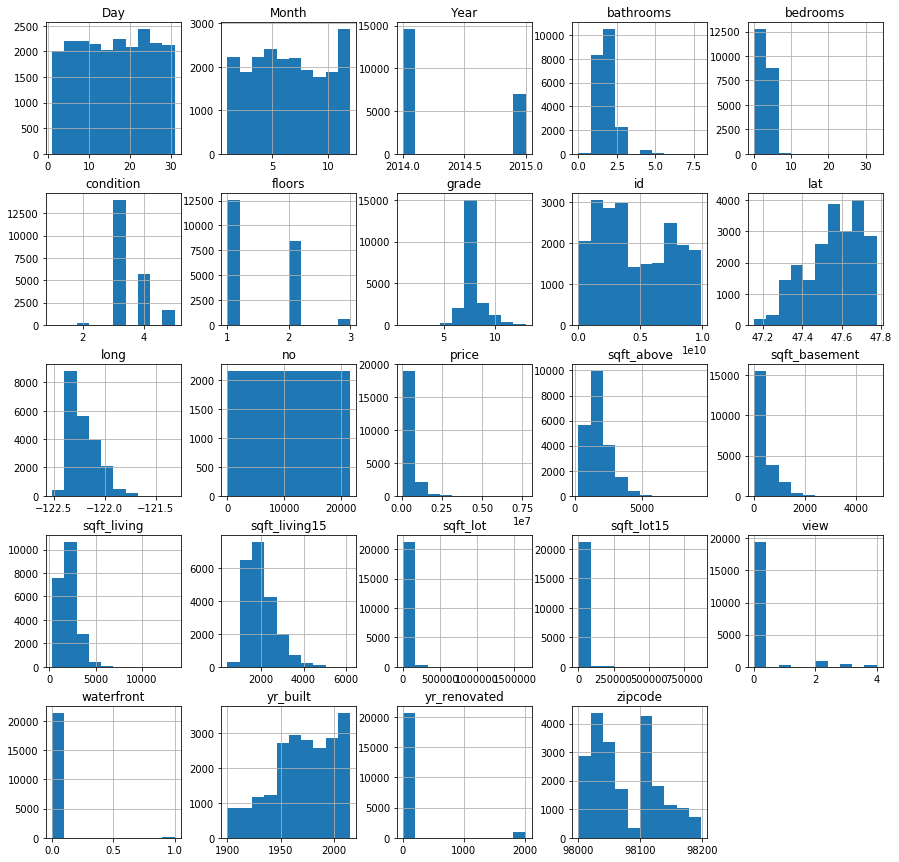

In [9]:
#visualization 3#
df_hp.select_dtypes(include=['int64']).columns
df_hp.hist(figsize=(15,15))
plt.show()

Text(0,0.5,'mean of house price')

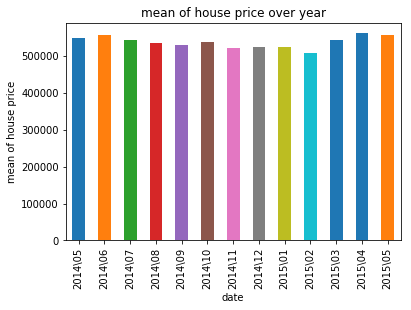

In [10]:
#visualization 4#
df_hp_year = df_hp.groupby(['date'])['price'].mean()
df_hp_year
df_hp_year.plot.bar()
plt.title('mean of house price over year')
plt.ylabel('mean of house price')

In [11]:
df_hp.describe().astype(np.int64)

,no,id,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610,...,21610,21610,21610,21610,21610,21610,21610,21610,21610,21610
mean,10808,4579931370,2014,6,15,540089,3,1,2080,15107,...,7,1788,291,1971,84,98077,47,-122,1986,12768
std,6238,2876575494,0,3,8,367150,0,0,918,41423,...,1,828,442,29,401,53,0,0,685,27306
min,1,1000102,2014,1,1,75000,0,0,290,520,...,1,290,0,1900,0,98001,47,-122,399,651
25%,5406,2123049179,2014,4,8,321612,3,1,1430,5040,...,7,1190,0,1951,0,98033,47,-122,1490,5100
50%,10808,3904925745,2014,6,16,450000,3,2,1910,7617,...,7,1560,0,1975,0,98065,47,-122,1840,7620
75%,16210,7308825087,2015,9,23,645000,4,2,2550,10687,...,8,2210,560,1997,0,98118,47,-122,2360,10083
max,21613,9900000190,2015,12,31,7700000,33,8,13540,1651359,...,13,9410,4820,2015,2015,98199,47,-121,6210,871200


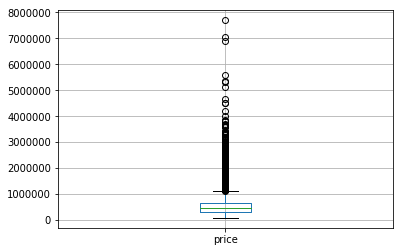

In [12]:
df_hp.boxplot(column='price')

In [13]:
#3.3 construct data#
df_hp['basement_present'] = df_hp['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df_hp['basement_present'] = df_hp['basement_present'].astype('category', ordered = False)

df_hp['renovated'] = df_hp['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df_hp['renovated'] = df_hp['renovated'].astype('category', ordered = False)
df_hp.head(10)

,no,id,date,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,renovated
0,1,7129300520,2014\10,2014,10,13,221900.0,3,1,1180,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,2,6414100192,2014\12,2014,12,9,538000.0,3,2,2570,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,3,5631500400,2015\02,2015,2,25,180000.0,2,1,770,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,4,2487200875,2014\12,2014,12,9,604000.0,4,3,1960,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,5,1954400510,2015\02,2015,2,18,510000.0,3,2,1680,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
5,6,7237550310,2014\05,2014,5,12,1225000.0,4,4,5420,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,1,0
6,7,1321400060,2014\06,2014,6,27,257500.0,3,2,1715,...,0,1995,0,98003,47.3097,-122.327,2238,6819,0,0
7,8,2008000270,2015\01,2015,1,15,291850.0,3,1,1060,...,0,1963,0,98198,47.4095,-122.315,1650,9711,0,0
8,9,2414600126,2015\04,2015,4,15,229500.0,3,1,1780,...,730,1960,0,98146,47.5123,-122.337,1780,8113,1,0
9,10,3793500160,2015\03,2015,3,12,323000.0,3,2,1890,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0,0


In [14]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 27 columns):
no                  21610 non-null int64
id                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
Day                 21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 n

In [15]:
df_hp['bathrooms']=df_hp['bathrooms'].astype(np.int64)
df_hp['floors']=df_hp['floors'].astype(np.int64)
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 27 columns):
no                  21610 non-null int64
id                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
Day                 21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 n

In [16]:
df_hp_sub=df_hp.drop(['id'],axis=1)
df_hp = df_hp_sub

In [17]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 26 columns):
no                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
Day                 21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610

In [18]:
def get_season(Month):
    if Month < 4:
        return 'winter'
    elif Month < 7:
        return 'spring'
    elif Month < 10:
        return 'summer'
    else:
        return 'autumn'
df_hp.loc[:, 'season'] = df_hp['Month'].apply(get_season)
df_hp.head(100)

,no,date,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement_present,renovated,season
0,1,2014\10,2014,10,13,221900.0,3,1,1180,5650,...,1955,0,98178,47.5112,-122.257,1340,5650,0,0,autumn
1,2,2014\12,2014,12,9,538000.0,3,2,2570,7242,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,1,autumn
2,3,2015\02,2015,2,25,180000.0,2,1,770,10000,...,1933,0,98028,47.7379,-122.233,2720,8062,0,0,winter
3,4,2014\12,2014,12,9,604000.0,4,3,1960,5000,...,1965,0,98136,47.5208,-122.393,1360,5000,1,0,autumn
4,5,2015\02,2015,2,18,510000.0,3,2,1680,8080,...,1987,0,98074,47.6168,-122.045,1800,7503,0,0,winter
5,6,2014\05,2014,5,12,1225000.0,4,4,5420,101930,...,2001,0,98053,47.6561,-122.005,4760,101930,1,0,spring
6,7,2014\06,2014,6,27,257500.0,3,2,1715,6819,...,1995,0,98003,47.3097,-122.327,2238,6819,0,0,spring
7,8,2015\01,2015,1,15,291850.0,3,1,1060,9711,...,1963,0,98198,47.4095,-122.315,1650,9711,0,0,winter
8,9,2015\04,2015,4,15,229500.0,3,1,1780,7470,...,1960,0,98146,47.5123,-122.337,1780,8113,1,0,spring
9,10,2015\03,2015,3,12,323000.0,3,2,1890,6560,...,2003,0,98038,47.3684,-122.031,2390,7570,0,0,winter


In [19]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 27 columns):
no                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
Day                 21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610

Text(0,0.5,'count')

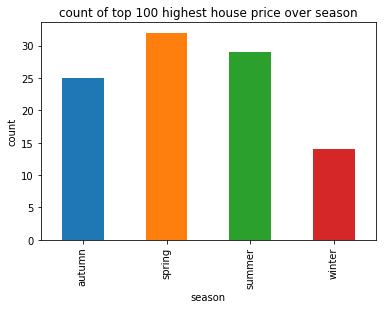

In [20]:
sort = df_hp.sort_values(by='price', ascending=False).head(100)
sort.groupby(['season'])['price'].count().plot.bar()
plt.title('count of top 100 highest house price over season')
plt.xlabel('season')
plt.ylabel('count')

In [21]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})


In [22]:
#%%capture
train_data,test_data = train_test_split(df_hp,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df_hp[['sqft_living']],df_hp['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Price for Test Data: 535300.685
Intercept: -50622.66920753475
Coefficient: [284.18559424]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,250212.609,0.497,-,0.475,-,0.491


In [23]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [24]:
train_data_dm,test_data_dm = train_test_split(df_hp,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_1,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -55869929.23859623
Coefficients: [-6.18908549e+04  3.87167719e+04  3.13584862e+02 -3.20363703e-01
 -2.85575657e+04  5.70413265e+02]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression-1,selected features,244561.842,0.522,0.522,0.498,0.498,0.515
0,Simple Linear Regression,-,250212.609,0.497,-,0.475,-,0.491


In [25]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 6422923.930826101
Coefficients: [-3.75027856e+04  5.16859462e+04  1.12673247e+02  1.46498363e-01
 -3.38751912e+03  5.87803994e+05  5.52182388e+04  2.71018562e+04
  9.45187153e+04  7.49657767e+01  3.77074704e+01 -2.49875918e+03
  1.53663749e+01 -5.93393021e+02  6.08186555e+05 -2.21798037e+05
  1.96984600e+01 -4.34432986e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,all features,186383.849,0.700,0.7,0.709,0.708,0.697
1,Multiple Regression-1,selected features,244561.842,0.522,0.522,0.498,0.498,0.515
0,Simple Linear Regression,-,250212.609,0.497,-,0.475,-,0.491


In [26]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','all features, no preprocessing',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 6422923.930826101
Coefficients: [-3.75027856e+04  5.16859462e+04  1.12673247e+02  1.46498363e-01
 -3.38751912e+03  5.87803994e+05  5.52182388e+04  2.71018562e+04
  9.45187153e+04  7.49657767e+01  3.77074704e+01 -2.49875918e+03
  1.53663749e+01 -5.93393021e+02  6.08186555e+05 -2.21798037e+05
  1.96984600e+01 -4.34432986e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,all features,186383.849,0.700,0.7,0.709,0.708,0.697
3,Multiple Regression-3,"all features, no preprocessing",186383.849,0.700,0.7,0.709,0.708,0.697
1,Multiple Regression-1,selected features,244561.842,0.522,0.522,0.498,0.498,0.515
0,Simple Linear Regression,-,250212.609,0.497,-,0.475,-,0.491


In [27]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_R.intercept_))
print('Coefficients: {}'.format(complex_model_R.coef_))

pred1 = complex_model_R.predict(test_data_dm[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_R.predict(test_data_dm[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_hp[features],df_hp['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


Intercept: 6441948.214792382
Coefficients: [-3.75363010e+04  5.16802050e+04  1.12697635e+02  1.45432944e-01
 -3.28611782e+03  5.82440447e+05  5.54287548e+04  2.70809085e+04
  9.45895675e+04  7.49284624e+01  3.77709566e+01 -2.50276008e+03
  1.53956783e+01 -5.90867323e+02  6.05948836e+05 -2.20547499e+05
  1.96572481e+01 -4.34771662e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
2,Multiple Regression-2,all features,186383.849,0.700,0.7,0.709,0.708,0.697
3,Multiple Regression-3,"all features, no preprocessing",186383.849,0.700,0.7,0.709,0.708,0.697
4,Ridge Regression,"alpha=1, all features",186376.913,0.700,0.7,0.709,0.708,0.697
5,Ridge Regression,"alpha=100, all features",188381.054,0.693,0.693,0.702,0.701,0.690
6,Ridge Regression,"alpha=1000, all features",199669.805,0.658,0.658,0.666,0.664,0.654
1,Multiple Regression-1,selected features,244561.842,0.522,0.522,0.498,0.498,0.515
0,Simple Linear Regression,-,250212.609,0.497,-,0.475,-,0.491


Text(0,0.5,'count')

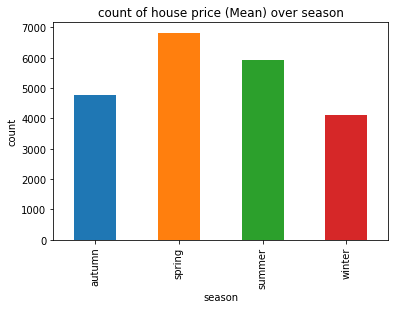

In [28]:
sort = df_hp.sort_values(by='price', ascending=False)
sort.groupby(['season'])['price'].count().plot.bar()
plt.title('count of house price (Mean) over season')
plt.xlabel('season')
plt.ylabel('count')

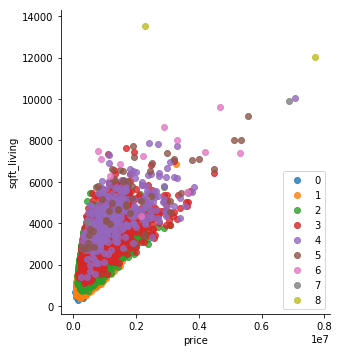

In [29]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="price", y="sqft_living", data=df_hp, fit_reg=False, hue='bathrooms', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

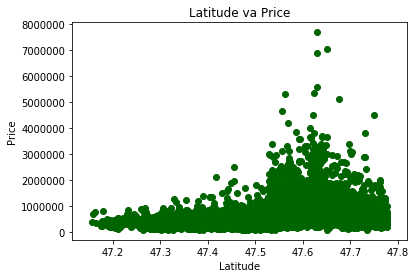

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [30]:
plt.scatter(df_hp.lat, df_hp.price, color='darkgreen')
plt.title("Latitude va Price")
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()
sns.despine

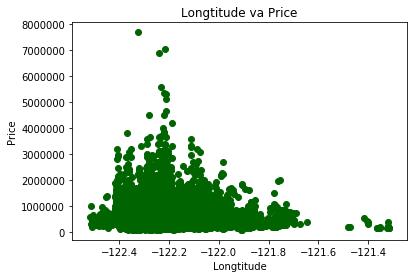

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [31]:
plt.scatter(df_hp.long, df_hp.price, color='darkgreen')
plt.title("Longtitude va Price")
plt.xlabel('Longtitude')
plt.ylabel('Price')
plt.show()
sns.despine

In [32]:
# find the row of the house which has the highest price
maxpr=df_hp.loc[df_hp['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_hp_copy = df_hp.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_hp_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_hp_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

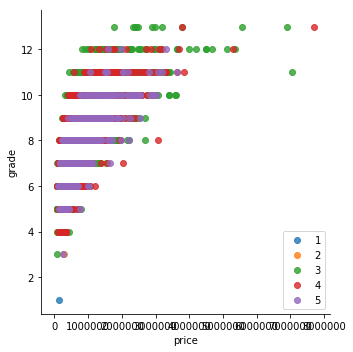

In [33]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="price", y="grade", data=df_hp, fit_reg=False, hue='condition', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

Text(0,0.5,'price')

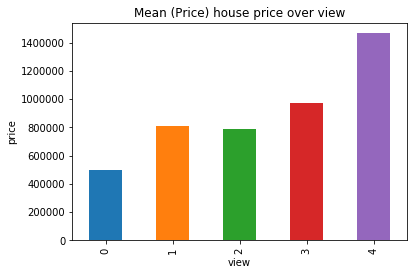

In [34]:
sort = df_hp.sort_values(by='price', ascending=False)
sort.groupby(['view'])['price'].mean().plot.bar()
plt.title('Mean (Price) house price over view')
plt.xlabel('view')
plt.ylabel('price')

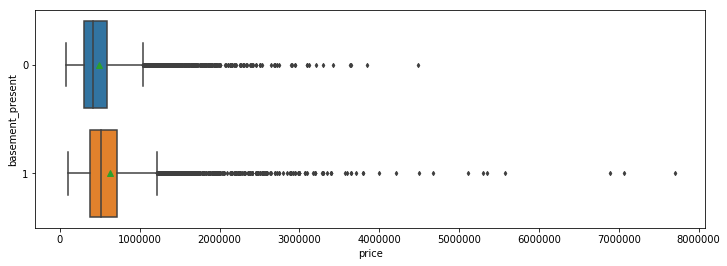

In [35]:
# variable basement_present
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = df_hp, width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
#r, p = stats.pointbiserialr(df_hp['basement_present'], df_hp['price'])
#print ('point biserial correlation r between price and presence_of_basement is %s with p = %s' %(r,p))

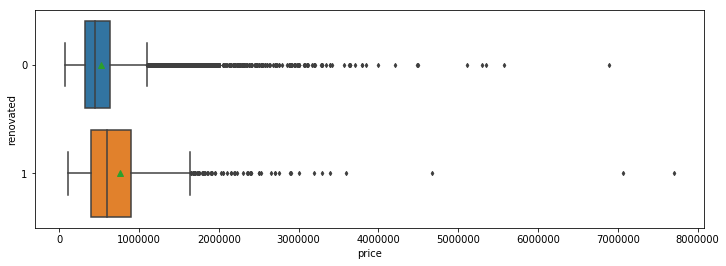

point biserial correlation r between price and presence_of_renovation is 0.12608654527015475 with p = 2.7478502308587013e-77


In [36]:
#variable 'renovated'
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = df_hp,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df_hp['renovated'], df_hp['price'])
print ('point biserial correlation r between price and presence_of_renovation is %s with p = %s' %(r,p))

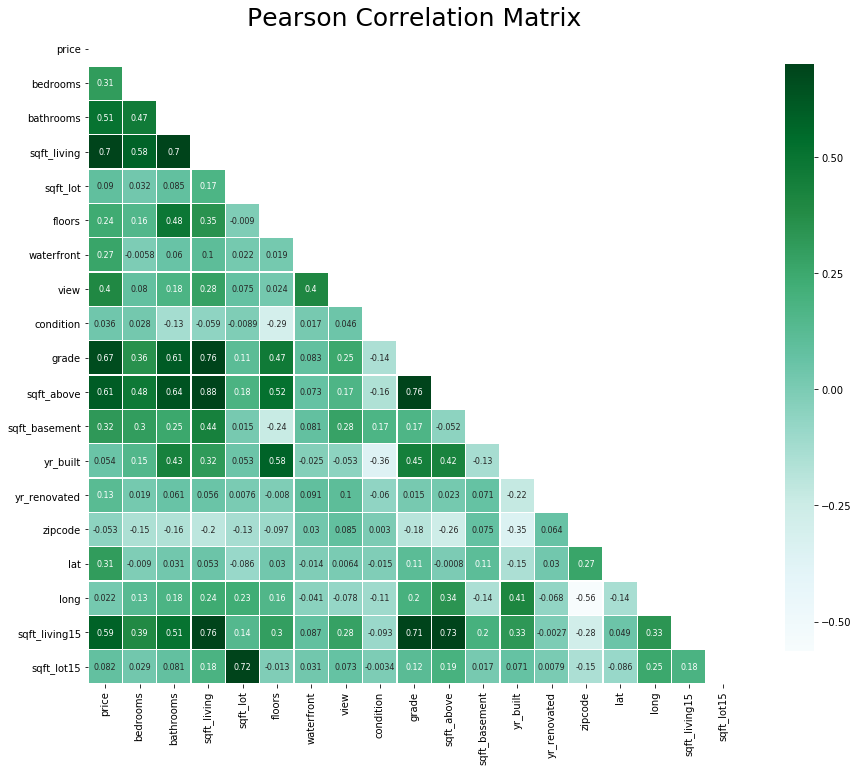

In [37]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']


mask = np.zeros_like(df_hp[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_hp[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# Time Series

In [38]:
df_hp['myDt']=pd.to_datetime(df_hp[['Year','Month','Day']],errors='coerce')


In [39]:
# We create time series for data:

tlen = pd.Series(data=df_hp['price'].values, index=df_hp['myDt'])


In [40]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 28 columns):
no                  21610 non-null int64
date                21610 non-null object
Year                21610 non-null int64
Month               21610 non-null int64
Day                 21610 non-null int64
price               21610 non-null float64
bedrooms            21610 non-null int64
bathrooms           21610 non-null int64
sqft_living         21610 non-null int64
sqft_lot            21610 non-null int64
floors              21610 non-null int64
waterfront          21610 non-null int64
view                21610 non-null int64
condition           21610 non-null int64
grade               21610 non-null int64
sqft_above          21610 non-null int64
sqft_basement       21610 non-null int64
yr_built            21610 non-null int64
yr_renovated        21610 non-null int64
zipcode             21610 non-null int64
lat                 21610 non-null float64
long                21610

In [41]:
total_price = df_hp.groupby('myDt')['price'].mean().reset_index()


In [42]:
total_price = total_price.set_index('myDt')
total_price.index

DatetimeIndex(['2014-05-02', '2014-05-03', '2014-05-04', '2014-05-05',
               '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09',
               '2014-05-10', '2014-05-11',
               ...
               '2015-05-14', '2015-05-15', '2015-05-16', '2015-05-18',
               '2015-05-20', '2015-05-22', '2015-05-23', '2015-05-24',
               '2015-05-26', '2015-05-27'],
              dtype='datetime64[ns]', name='myDt', length=383, freq=None)

In [43]:
# total_price

In [44]:
# y = total_reaction['total_likes']
y = total_price['price'].resample('W').mean()
# y = total_price['price'].resample('W').median()


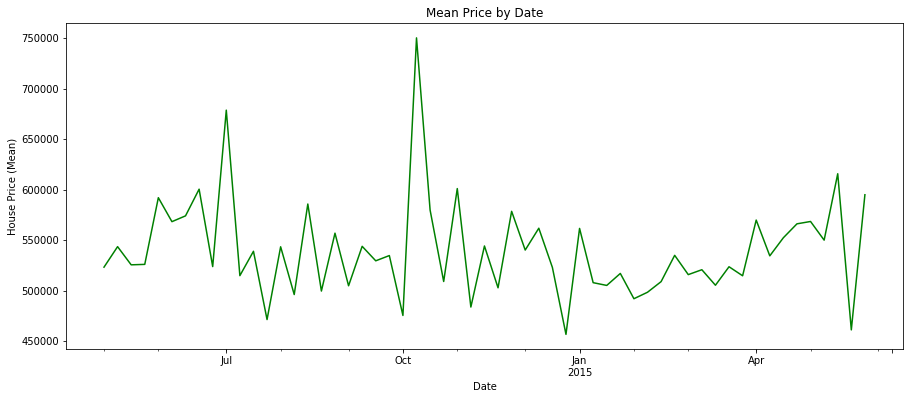

In [45]:
y.plot(figsize=(15, 6),color='g')
plt.title('Mean Price by Date')
plt.xlabel("Date")
plt.ylabel("House Price (Mean)")
plt.show()

<Figure size 432x288 with 0 Axes>

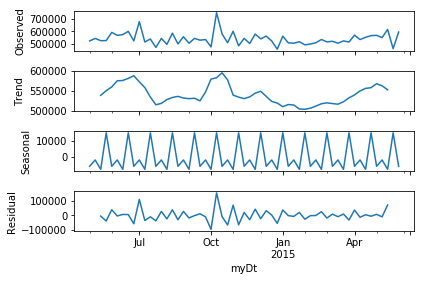

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive', freq=4)

fig = plt.figure()  
fig = result.plot()  


# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(y, model='additive', freq=4)
# # result = seasonal_decompose(y, model='additive',freq=4)
# fig = plt.figure()  
# fig = result.plot()  

In [47]:
import itertools   
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7134      0.328     -2.173      0.030      -1.357      -0.070
ma.L1         -0.1408      0.703     -0.200      0.841      -1.519       1.237
ar.S.L12      -0.3408      0.212     -1.610      0.107      -0.756       0.074
sigma2       6.16e+09   1.83e-11   3.36e+20      0.000    6.16e+09    6.16e+09


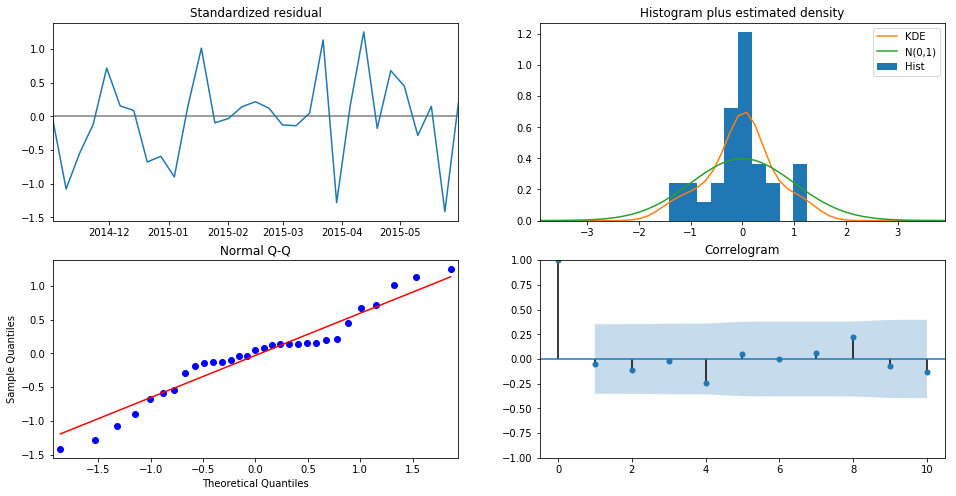

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [50]:
len(y.index)

57

In [51]:
pred = results.get_prediction(start=40, dynamic=False)


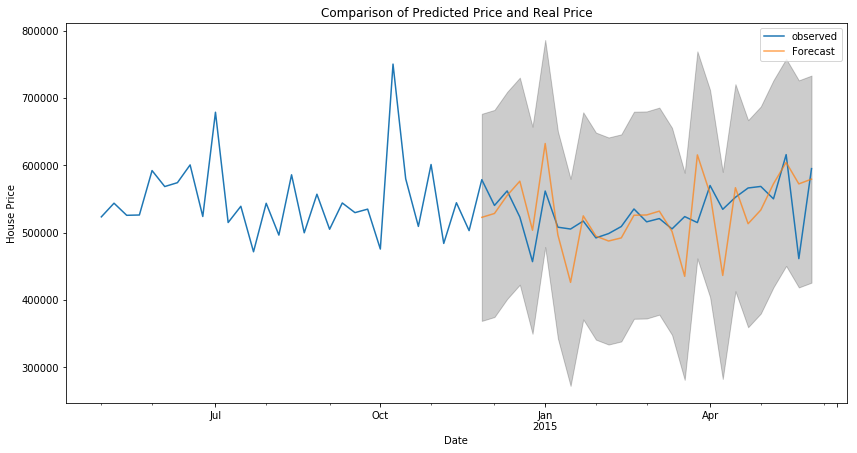

In [52]:
# pred = results.get_prediction(start=pd.to_datetime('2015-05-15'), dynamic=False)
pred = results.get_prediction(start=30, dynamic=False)

pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('House Price')
plt.legend()
plt.title('Comparison of Predicted Price and Real Price')
plt.show()

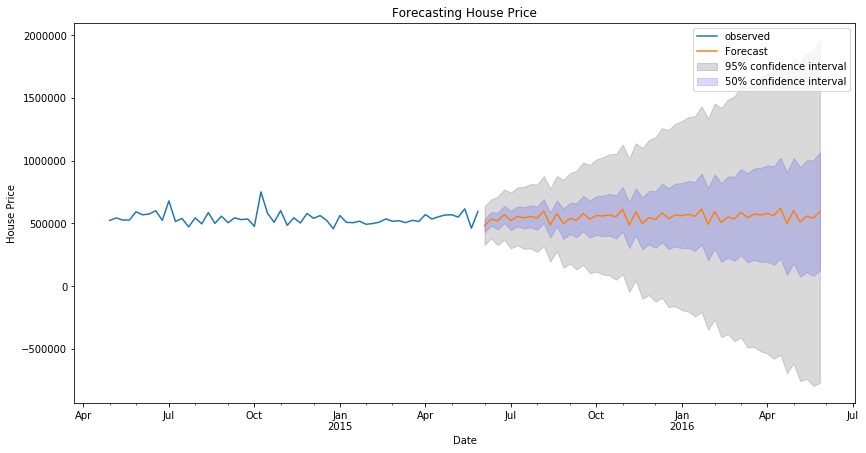

In [53]:
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int(alpha=0.05)
ax = y['2014':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], label='95% confidence interval',  color='k', alpha=.15)


pred_ci = pred_uc.conf_int(alpha=0.5)
# ax = y['2014':].plot(label='observed', figsize=(14, 7))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], label='50% confidence interval', color='b', alpha=.15)


ax.set_xlabel('Date')
ax.set_ylabel('House Price')
plt.legend()
plt.title('Forecasting House Price')
plt.show()